In [14]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
from numpy.random import default_rng
import risktools as rt
from time import time
from numpy.random import default_rng, Generator, SFC64
from numba import njit

jump_avgsize = 2
jump_stdv = 0.32
sims = 20
jump_prob = 1
dt = 0.25

elp = pd.Series(
    np.random.lognormal(mean=np.log(jump_avgsize), sigma=jump_stdv, size=sims)
)
jp = pd.Series(np.random.poisson(lam=jump_prob * dt, size=sims))

rng = Generator(SFC64())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df = rt.simOUJ_MV(
    s0=[5]*3,
    mu=[4]*3,
    theta=[20]*3,
    sigma=[0.32]*3,
    cor=np.diag(np.ones(3)),
    T=5,
    jump_avgsize=[jump_avgsize]*3, 
    jump_stdv=[jump_stdv]*3,
    sims=sims, 
    jump_prob=[jump_prob]*3, 
    dt=1/252, seed=42, 
    log_price=False, 
    mr_lag=[40]*3,
    c=True)

Half-life of theta in days =  8.73365447505531
Half-life of theta in days =  8.73365447505531
Half-life of theta in days =  8.73365447505531


<AxesSubplot: >

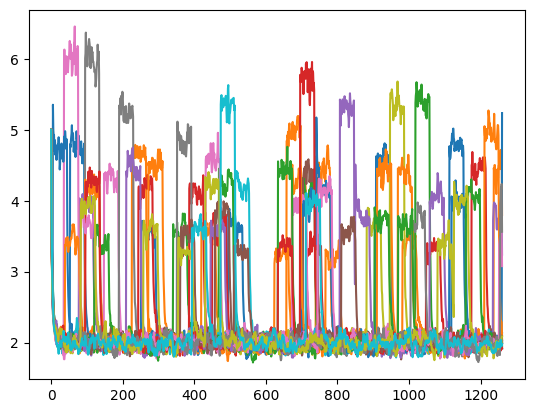

In [18]:
pd.DataFrame(df[:,:,2]).plot(legend=False)